In [81]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

In [82]:
# Identity gates for all intensities are optional
def initialize(circuit, intensity, idx):
    for i in range(intensity.size):
        circuit.i(i)

    for i in range(idx.size):
        circuit.h(intensity.size+i)

    circuit.barrier()

In [83]:
def combinePosIntensity(circuit, qubits):
    for i in range(qubits):
        circuit.i(i)

    circuit.barrier()

In [84]:
def encodeGreyScalePixels(value, idx_qubit, circuit, num_qubits):
    
    if (value != len(value) * value[0]):
        circuit.x(num_qubits-idx_qubit)

    for idx, bit_value in enumerate(reversed(value)):
        if (bit_value == '1'):
            circuit.ccx(num_qubits-1, num_qubits-2, idx)

    if (value != len(value) * value[0]):
        circuit.x(num_qubits-idx_qubit)

    circuit.barrier()

In [85]:
def measureCircuit(circuit, qubits):
    circuit.measure(range(qubits),range(qubits))

In [86]:
def createCircuitInstance(pixel_pos, pos_name, intensity_val, intensity_name, classical_bit, clasical_name):
    # Pixel position
    idx = QuantumRegister(pixel_pos, pos_name)
    # grayscale pixel intensity value
    intensity = QuantumRegister(intensity_val,intensity_name)
    # classical register
    cr = ClassicalRegister(classical_bit, clasical_name)

    circuit = QuantumCircuit(intensity, idx, cr)

    # set the total number of qubits
    num_qubits = circuit.num_qubits

    return circuit, idx, intensity, num_qubits

In [87]:
def createNRQI(num_pixels, grayscale_vals, xGate_idx_list):
    circuit, idx, intensity, num_qubits = createCircuitInstance(2, 'idx', 8, 'intensity', 10, 'cr')
    initialize(circuit, intensity, idx)
    combinePosIntensity(circuit, num_qubits)

    for i in range(num_pixels-1):
        encodeGreyScalePixels(grayscale_vals[i], xGate_idx_list[i], circuit, num_qubits)

    measureCircuit(circuit, num_qubits)

    return circuit


/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_80015/2169220258.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  circuit.i(i)
/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_80015/1963253760.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  circuit.i(i)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style=

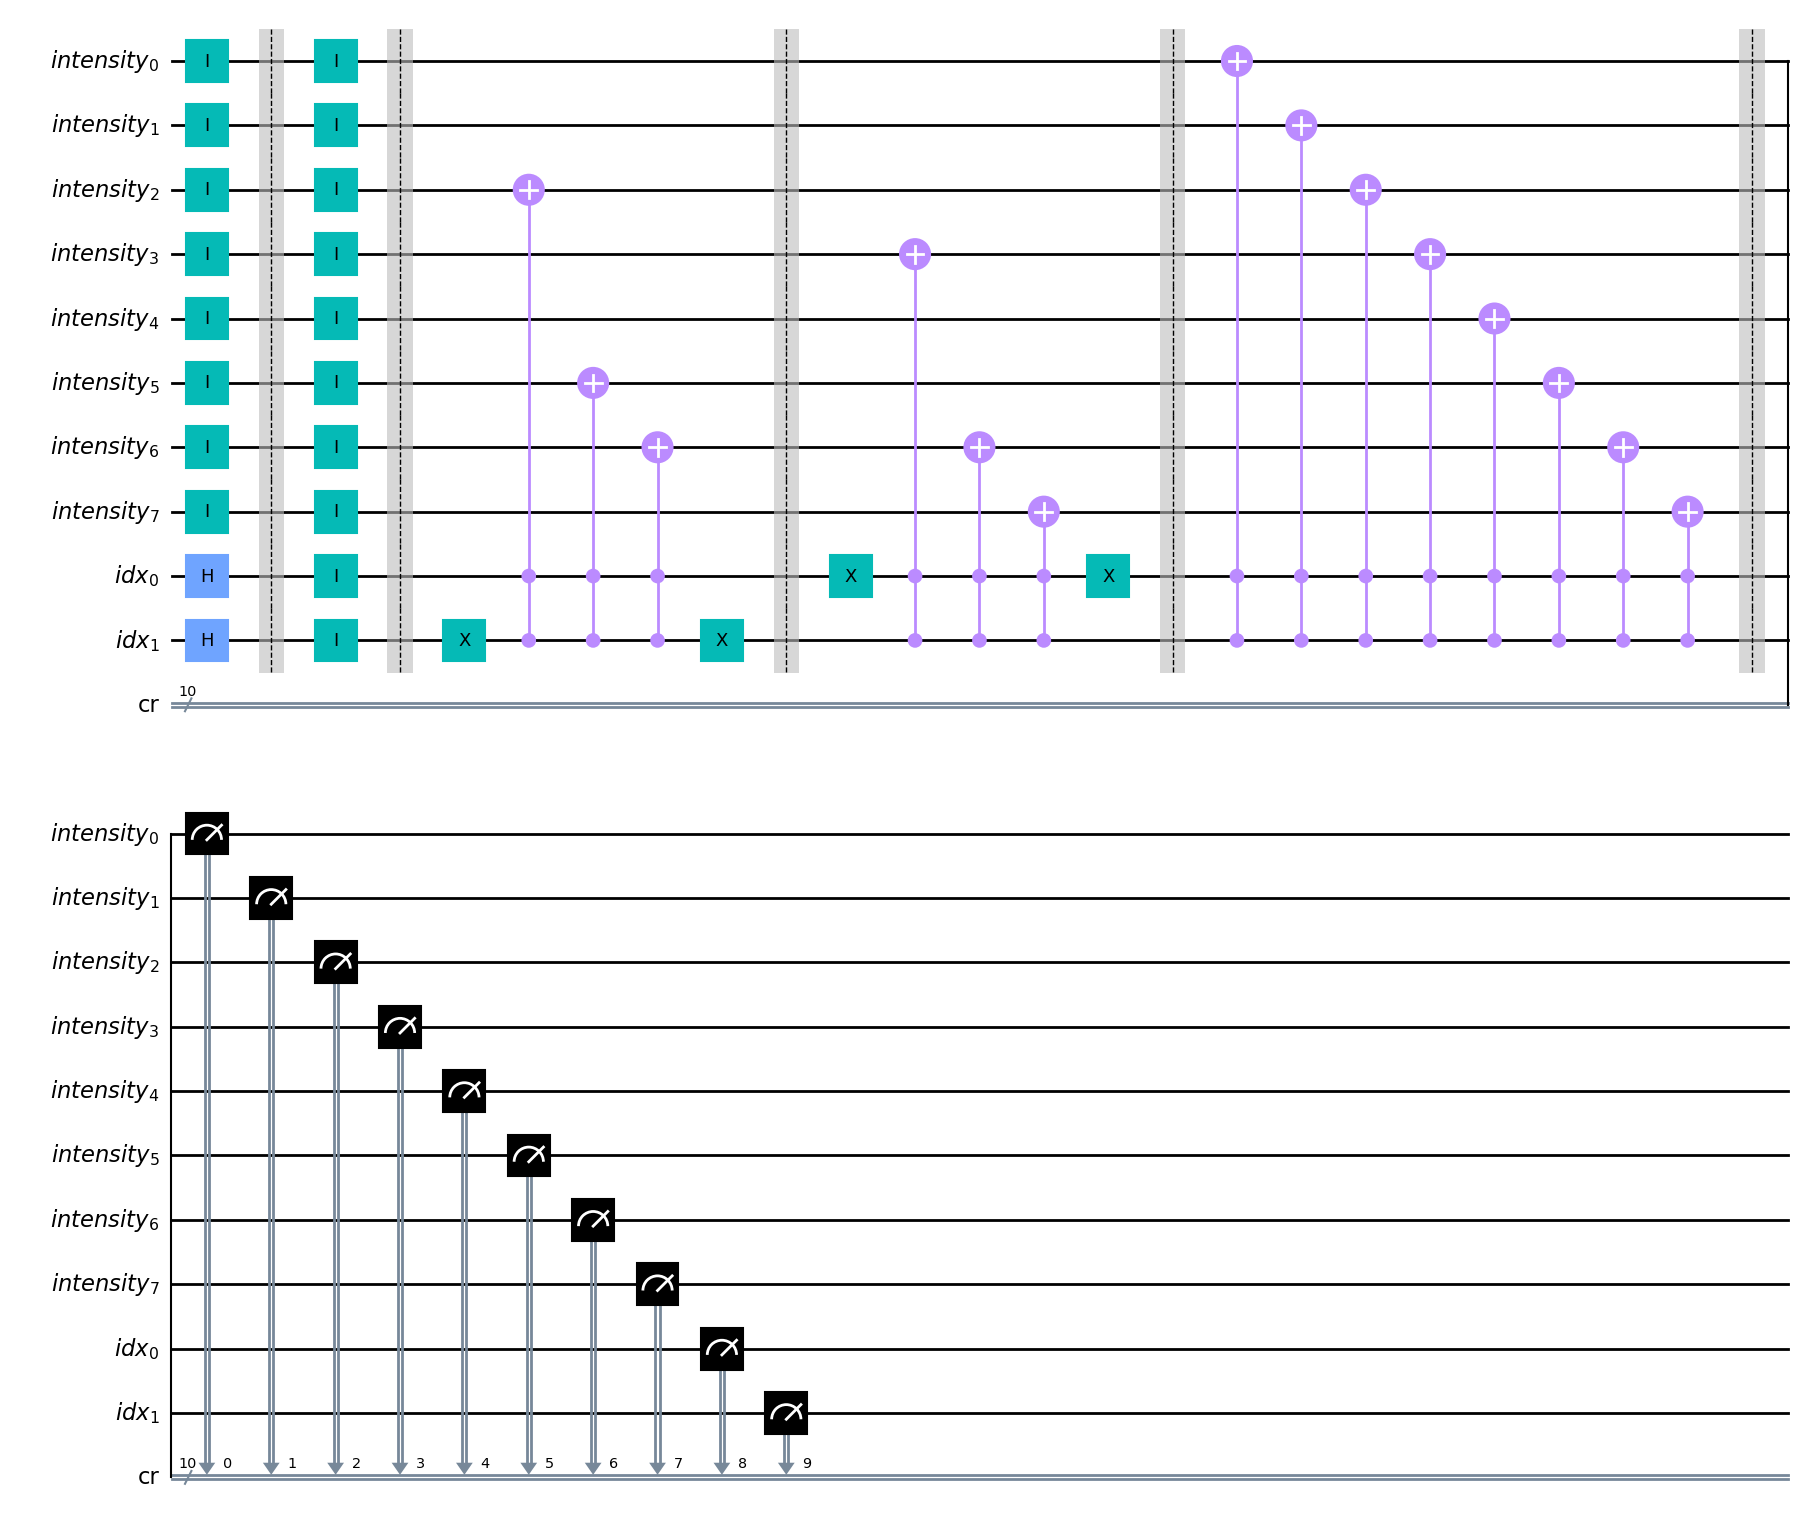

In [88]:
num_pixels = 4
grayscale_vals = ['01100100', '11001000', '11111111']
xGate_idx_list = [1, 2, 1]

circuit = createNRQI(num_pixels, grayscale_vals, xGate_idx_list)
circuit.draw(output="mpl")

/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_80015/2371202611.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job_neqr = aer_sim.run(qobj)


{'0101100100': 2048, '1111111111': 1949, '1011001000': 2071, '0000000000': 2124}


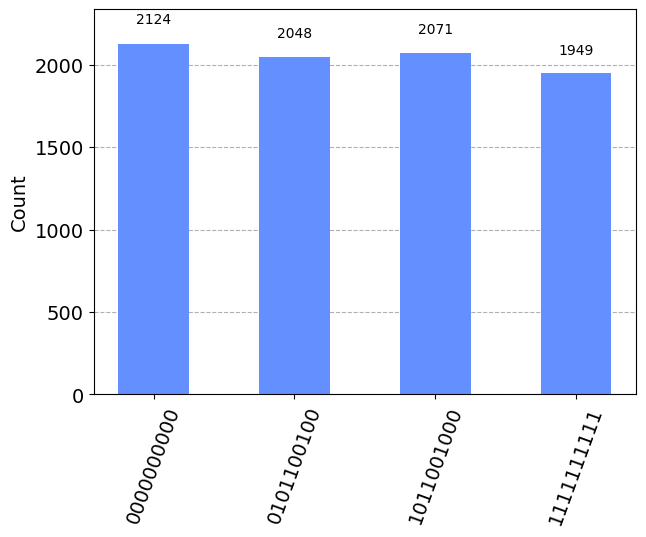

In [89]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(circuit, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()

print(counts_neqr)
plot_histogram(counts_neqr)